In [1]:
import numpy as np
import nibabel as nb
import pandas as pd
from nilearn import image, masking, plotting
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
%matplotlib notebook
plt.style.use('ggplot')

In [2]:
subject_list = range(101,115)+[116]+range(118,130)

### Load Data

In [3]:
def get_nonzero_arrays(image_stack):
    data_array = []
    for i in image_stack:
        i_data = i.get_data().ravel()
        i_data = i_data[i_data.nonzero()]
        data_array.append(i_data)
    return data_array

Get the paths to the lag maps.

In [4]:
aifo_rest1_compcor_paths = sorted(glob.glob('/home/despo/dlurie/Projects/megarest_lag/analysis/sub*/Aifo/sub*_Aifo_rest_1_compcor_lag10.nii.gz'))
aifo_rest2_compcor_paths = sorted(glob.glob('/home/despo/dlurie/Projects/megarest_lag/analysis/sub*/Aifo/sub*_Aifo_rest_2_compcor_lag10.nii.gz'))
aifo_rest3_compcor_paths = sorted(glob.glob('/home/despo/dlurie/Projects/megarest_lag/analysis/sub*/Aifo/sub*_Aifo_rest_3_compcor_lag10.nii.gz'))

In [5]:
dlpfc_rest1_compcor_paths = sorted(glob.glob('/home/despo/dlurie/Projects/megarest_lag/analysis/sub*/Dlpfc/sub*_Dlpfc_rest_1_compcor_lag10.nii.gz'))
dlpfc_rest2_compcor_paths = sorted(glob.glob('/home/despo/dlurie/Projects/megarest_lag/analysis/sub*/Dlpfc/sub*_Dlpfc_rest_2_compcor_lag10.nii.gz'))
dlpfc_rest3_compcor_paths = sorted(glob.glob('/home/despo/dlurie/Projects/megarest_lag/analysis/sub*/Dlpfc/sub*_Dlpfc_rest_3_compcor_lag10.nii.gz'))

In [6]:
sham_rest1_compcor_paths = sorted(glob.glob('/home/despo/dlurie/Projects/megarest_lag/analysis/sub*/Sham/sub*_Sham_rest_1_compcor_lag10.nii.gz'))
sham_rest2_compcor_paths = sorted(glob.glob('/home/despo/dlurie/Projects/megarest_lag/analysis/sub*/Sham/sub*_Sham_rest_2_compcor_lag10.nii.gz'))
sham_rest3_compcor_paths = sorted(glob.glob('/home/despo/dlurie/Projects/megarest_lag/analysis/sub*/Sham/sub*_Sham_rest_3_compcor_lag10.nii.gz'))

Load the lag maps as images.

In [7]:
aifo_rest1_compcor_4d = image.smooth_img(aifo_rest1_compcor_paths, None)
aifo_rest2_compcor_4d = image.smooth_img(aifo_rest2_compcor_paths, None)
aifo_rest3_compcor_4d = image.smooth_img(aifo_rest3_compcor_paths, None)

In [8]:
dlpfc_rest1_compcor_4d = image.smooth_img(dlpfc_rest1_compcor_paths, None)
dlpfc_rest2_compcor_4d = image.smooth_img(dlpfc_rest2_compcor_paths, None)
dlpfc_rest3_compcor_4d = image.smooth_img(dlpfc_rest3_compcor_paths, None)

In [9]:
sham_rest1_compcor_4d = image.smooth_img(sham_rest1_compcor_paths, None)
sham_rest2_compcor_4d = image.smooth_img(sham_rest2_compcor_paths, None)
sham_rest3_compcor_4d = image.smooth_img(sham_rest3_compcor_paths, None)

Get arrays containing only the brain voxels from each map.

In [10]:
aifo_rest1_nonzero_arrays = get_nonzero_arrays(aifo_rest1_compcor_4d)
aifo_rest2_nonzero_arrays = get_nonzero_arrays(aifo_rest2_compcor_4d)
aifo_rest3_nonzero_arrays = get_nonzero_arrays(aifo_rest3_compcor_4d)

In [11]:
dlpfc_rest1_nonzero_arrays = get_nonzero_arrays(dlpfc_rest1_compcor_4d)
dlpfc_rest2_nonzero_arrays = get_nonzero_arrays(dlpfc_rest2_compcor_4d)
dlpfc_rest3_nonzero_arrays = get_nonzero_arrays(dlpfc_rest3_compcor_4d)

In [12]:
sham_rest1_nonzero_arrays = get_nonzero_arrays(sham_rest1_compcor_4d)
sham_rest2_nonzero_arrays = get_nonzero_arrays(sham_rest2_compcor_4d)
sham_rest3_nonzero_arrays = get_nonzero_arrays(sham_rest3_compcor_4d)

### Calculate difference maps (rest 2 - rest 1)

In [15]:
def make_difference_img(img1_4d, img2_4d):
    img_diffs = []
    for idx, sub_img1 in enumerate(img1_4d):
        diff_img = image.math_img('np.subtract(map2, map1)', map2=img2_4d[idx], map1=sub_img1)
        img_diffs.append(diff_img)
    return img_diffs

In [16]:
aifo_diffs = make_difference_img(aifo_rest1_compcor_4d, aifo_rest2_compcor_4d)
dlpfc_diffs = make_difference_img(dlpfc_rest1_compcor_4d, dlpfc_rest2_compcor_4d)
sham_diffs = make_difference_img(sham_rest1_compcor_4d, sham_rest2_compcor_4d)

In [17]:
def save_diff_images(diff_img_array, subject_list, condition):
    for idx, sub_id in enumerate(subject_list):
        out_path = '/home/despo/dlurie/Projects/megarest_lag/analysis/sub{0}/{1}/sub{0}_{1}_compcor_r2minusr1_diffmap.nii.gz'.format(str(sub_id), condition)
        nb.save(diff_img_array[idx], out_path)
        out_path_smoothed = '/home/despo/dlurie/Projects/megarest_lag/analysis/sub{0}/{1}/sub{0}_{1}_compcor_r2minusr1_diffmap_smoothed5.nii.gz'.format(str(sub_id), condition)
        smoothed_img = image.smooth_img(diff_img_array[idx], 5)
        nb.save(smoothed_img, out_path_smoothed)

In [18]:
save_diff_images(aifo_diffs, subject_list, 'Aifo')
save_diff_images(dlpfc_diffs, subject_list, 'Dlpfc')
save_diff_images(sham_diffs, subject_list, 'Sham')

### Plot Lag Distributions (per subject)

In [21]:
def dist_grid(data_1, data_2, data_3, subject_list):
    n_subs = len(subject_list)
    n_cols = 4
    n_rows = int(np.ceil(n_subs/(float(n_cols))))

    ax_idx_x= []
    ax_idx_y= []
    for idx_x in range(n_rows):
        for idx_y in range(n_cols):
            ax_idx_y.append(idx_y)
            ax_idx_x.append(idx_x)

    f, axarr = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(12,2*n_rows))
    for idx, sub_id in enumerate(subject_list):
        sns.distplot(data_1[idx], hist=False, ax=axarr[ax_idx_x[idx], ax_idx_y[idx]], label='rest1')
        sns.distplot(data_2[idx], hist=False, ax=axarr[ax_idx_x[idx], ax_idx_y[idx]], label='rest2')
        sns.distplot(data_3[idx], hist=False, ax=axarr[ax_idx_x[idx], ax_idx_y[idx]], label='rest3')
        axarr[ax_idx_x[idx], ax_idx_y[idx]].legend()
        axarr[ax_idx_x[idx], ax_idx_y[idx]].set_title('Subject '+str(sub_id), fontsize=10)
    plt.xlim(-1, 1)
    plt.tight_layout()

#### AiFO

<IPython.core.display.Javascript object>


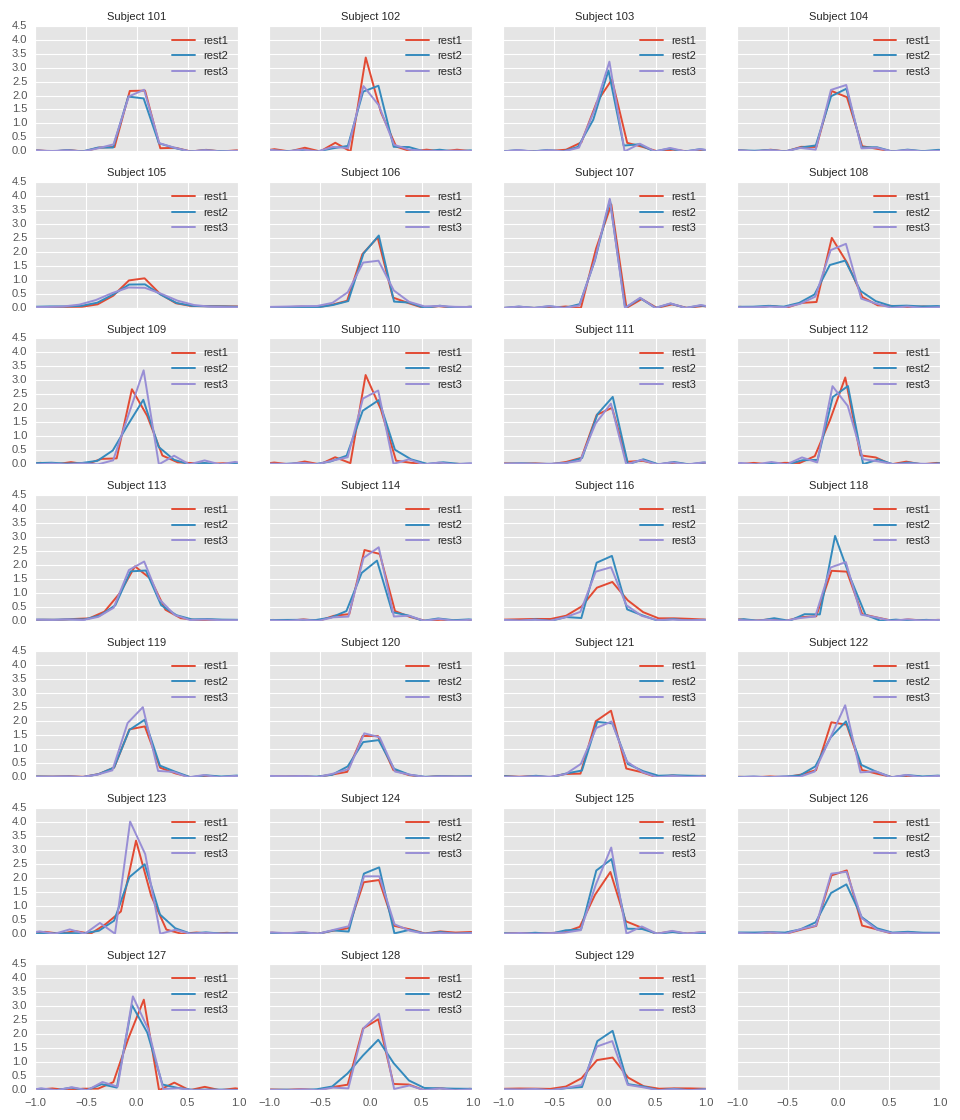

In [22]:
dist_grid(aifo_rest1_nonzero_arrays, aifo_rest2_nonzero_arrays, aifo_rest3_nonzero_arrays, subject_list)

#### dlPFC

<IPython.core.display.Javascript object>


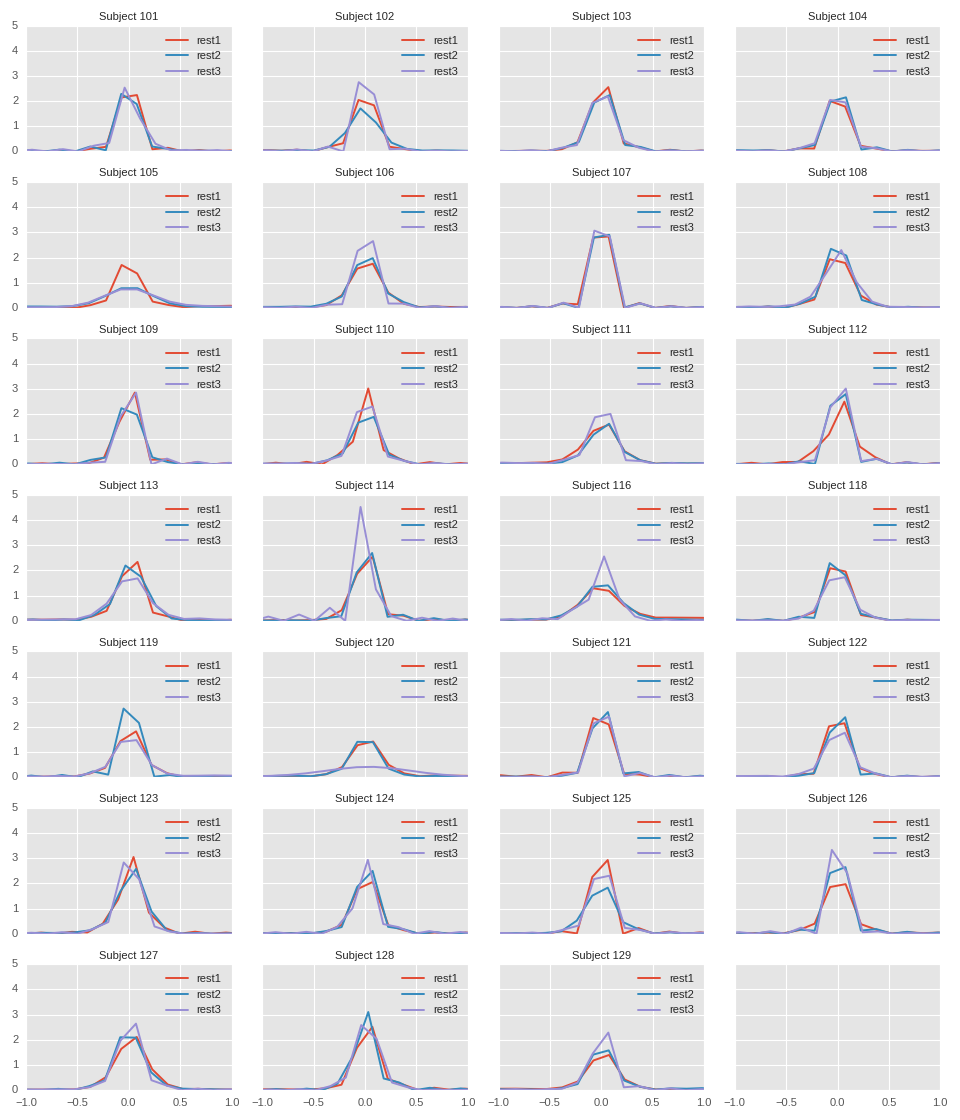

In [23]:
dist_grid(dlpfc_rest1_nonzero_arrays, dlpfc_rest2_nonzero_arrays, dlpfc_rest3_nonzero_arrays, subject_list)

#### S1

<IPython.core.display.Javascript object>


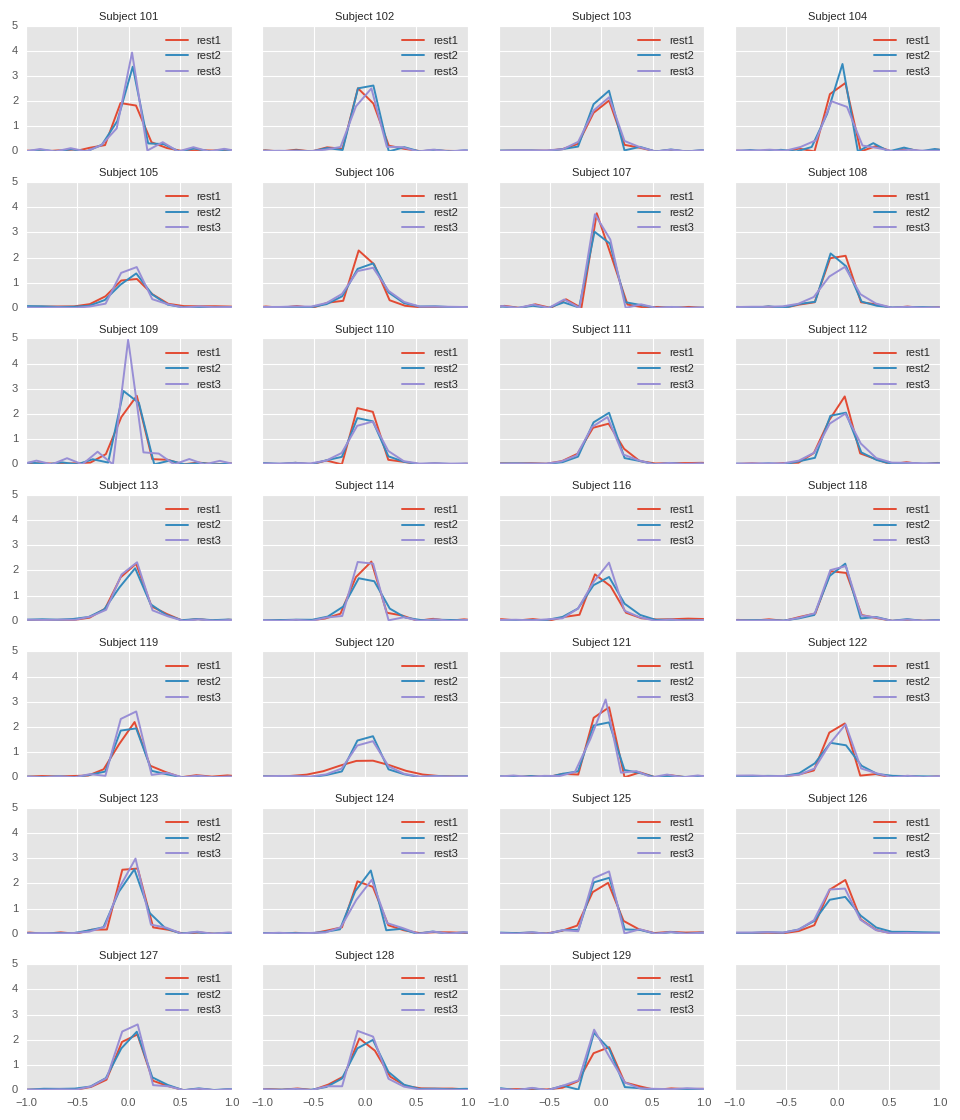

In [24]:
dist_grid(sham_rest1_nonzero_arrays, sham_rest2_nonzero_arrays, sham_rest3_nonzero_arrays, subject_list)

### Plot changes in extreme leads/lags

In [25]:
def count_extremes(sub_data, thresh):
    n_nonzero = np.count_nonzero(sub_data)
    n_greater = np.count_nonzero(sub_data <= -thresh)
    n_lesser = np.count_nonzero(sub_data >= thresh)
    pct_lead = np.true_divide(n_greater, n_nonzero)
    pct_lag = np.true_divide(n_lesser, n_nonzero)
    return pct_lead, pct_lag

In [26]:
roi_list = ['aifo', 'dlpfc', 's1']
scan_list = ['rest1', 'rest2', 'rest3']
measures = ['pct_big_lead', 'pct_big_lag, pct_big_any']

row_store = []
for subject in subject_list:
    for roi in roi_list:
        for scan in scan_list:
            for measure in measures:
                row = [str(subject), roi, scan, measure]
                row_store.append(row)

dists_df_mindex = pd.MultiIndex.from_arrays(np.array(row_store).T, names=['sub_id', 'roi', 'scan', 'measure'])
dists_dframe = pd.DataFrame(index=dists_df_mindex)
dists_dframe['value'] = np.nan

In [27]:
input_arrays =[[aifo_rest1_nonzero_arrays, 'aifo', 'rest1'],
               [aifo_rest2_nonzero_arrays, 'aifo', 'rest2'],
               [aifo_rest3_nonzero_arrays, 'aifo', 'rest3'],
               [dlpfc_rest1_nonzero_arrays, 'dlpfc', 'rest1'],
               [dlpfc_rest2_nonzero_arrays, 'dlpfc', 'rest2'],
               [dlpfc_rest3_nonzero_arrays, 'dlpfc', 'rest3'],
               [sham_rest1_nonzero_arrays, 's1', 'rest1'],
               [sham_rest2_nonzero_arrays, 's1', 'rest2'],
               [sham_rest3_nonzero_arrays, 's1', 'rest3']]

for sub_array in input_arrays:
    data_array = sub_array[0]
    roi = sub_array[1]
    #print(roi)
    scan = sub_array[2]
    #print(scan)
    for idx, sub_id in enumerate(subject_list):
        sub_id = str(sub_id)
        counts = count_extremes(data_array[idx], 1)
        dists_dframe.ix[sub_id, roi, scan, 'pct_big_lead'] = counts[0]
        dists_dframe.ix[sub_id, roi, scan, 'pct_big_lag'] = counts[1]
        dists_dframe.ix[sub_id, roi, scan, 'pct_big_any'] = counts[0] + counts[1]

In [28]:
dists_dflat = dists_dframe.reset_index()
dists_df_leads = dists_dflat[dists_dflat['measure'] == 'pct_big_lead']
dists_df_lags = dists_dflat[dists_dflat['measure'] == 'pct_big_lag']
dists_df_any = dists_dflat[dists_dflat['measure'] == 'pct_big_any']

#### Percent of voxels with lead > 2s

<IPython.core.display.Javascript object>


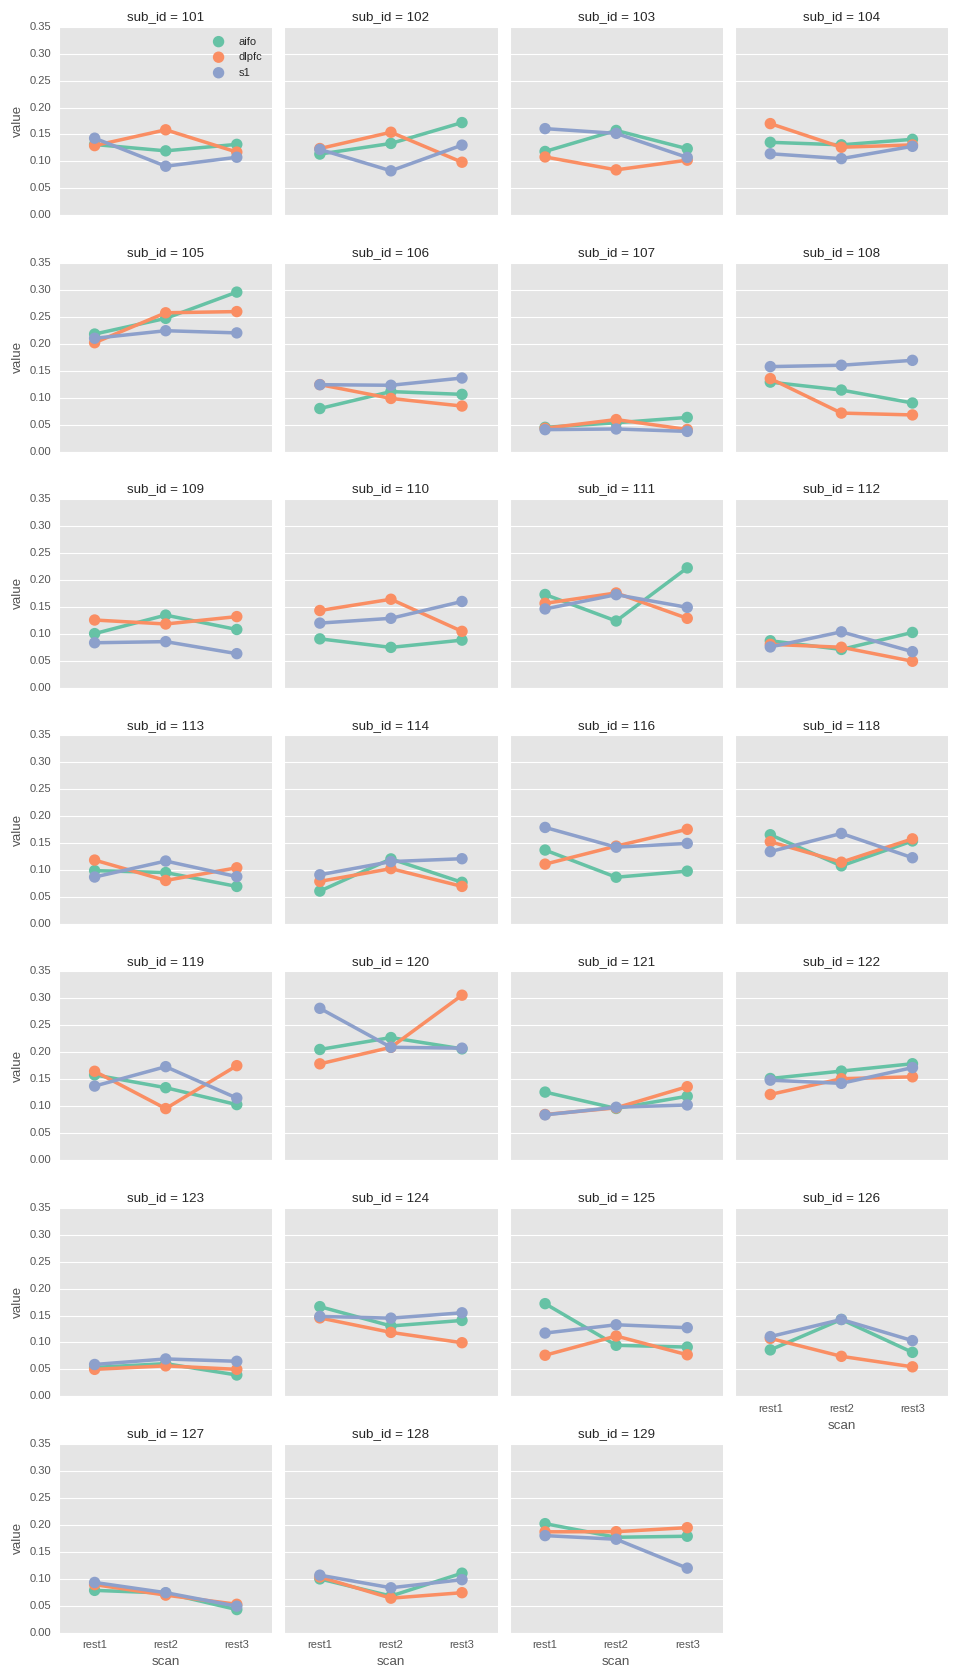

In [29]:
g = sns.FacetGrid(dists_df_leads, col="sub_id", size=3, aspect=1, col_wrap=4, legend_out=False)
g.map(sns.pointplot, "scan", "value", 'roi', palette="Set2");
g.add_legend()

#### Percent of voxels with lags > 2s

<IPython.core.display.Javascript object>


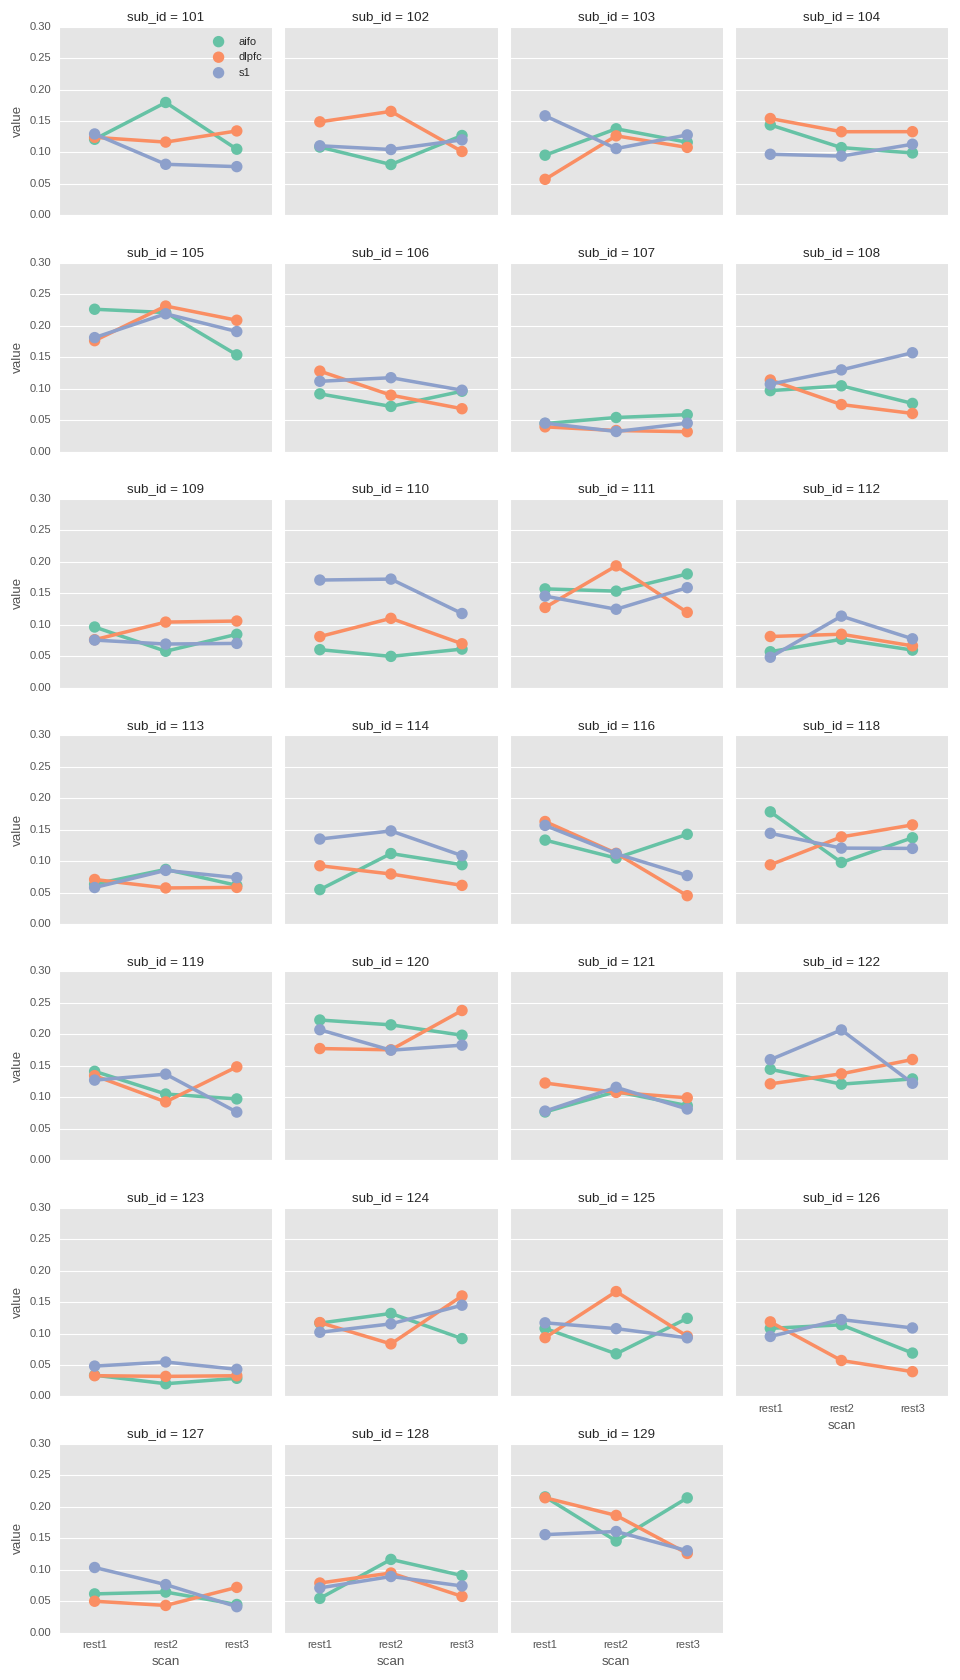

In [30]:
g = sns.FacetGrid(dists_df_lags, col="sub_id", size=3, aspect=1, col_wrap=4, legend_out=False)
g.map(sns.pointplot, "scan", "value", 'roi', palette="Set2");
g.add_legend()

#### Percent of voxels with leads or lags > 2s

<IPython.core.display.Javascript object>


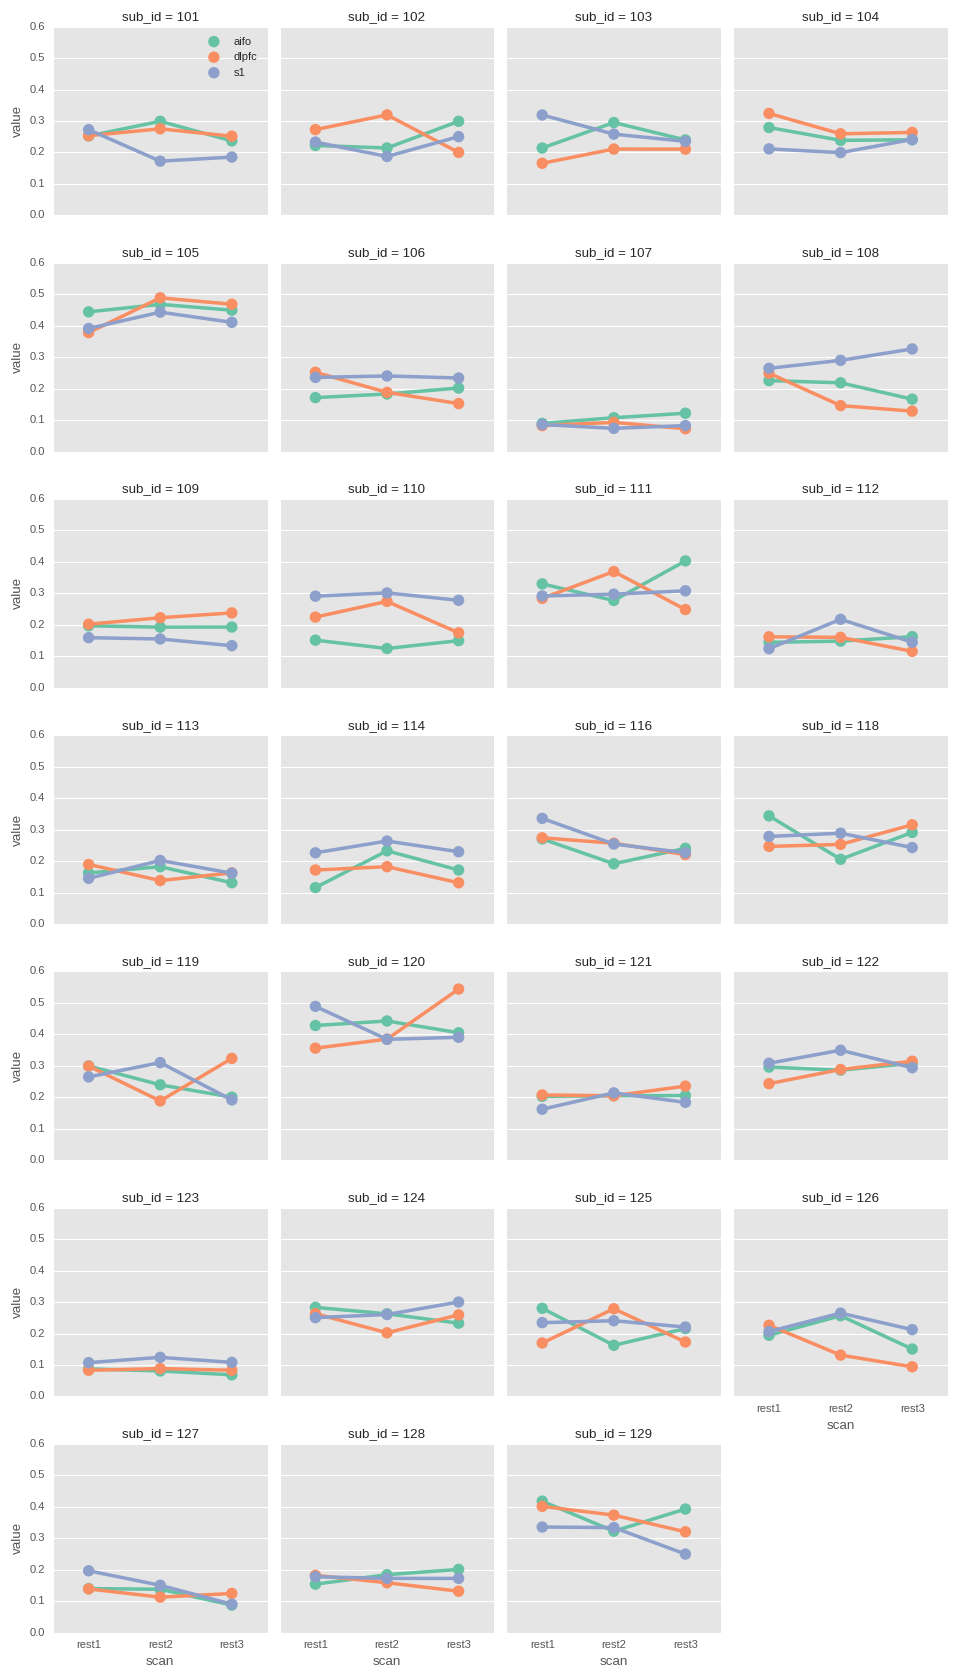

In [31]:
g = sns.FacetGrid(dists_df_any, col="sub_id", size=3, aspect=1, col_wrap=4, legend_out=False)
g.map(sns.pointplot, "scan", "value", 'roi', palette="Set2");
g.add_legend()

### TMS ROI Analysis

In [32]:
def resample_rois(condition_4d, condition_roi_paths):
    out_4d = []
    for idx, sub_img in enumerate(condition_4d):
        roi_path = condition_roi_paths[idx]
        roi_img = image.smooth_img(roi_path, None)
        roi_img_resampled = image.resample_to_img(roi_img, sub_img, interpolation='nearest')
        out_4d.append(roi_img_resampled)
    return out_4d

In [33]:
aifo_roi_paths = sorted(glob.glob('/home/despo/dlurie/Projects/megarest_lag/data/sub*/Aifo/sub*_Aifo_roi.nii.gz'))
dlpfc_roi_paths = sorted(glob.glob('/home/despo/dlurie/Projects/megarest_lag/data/sub*/Dlpfc/sub*_Dlpfc_roi.nii.gz'))
sham_roi_paths = sorted(glob.glob('/home/despo/dlurie/Projects/megarest_lag/data/sub*/Sham/sub*_S1_L_roi.nii.gz'))

In [34]:
aifo_resampled_rois = resample_rois(aifo_rest1_compcor_4d, aifo_roi_paths)
dlpfc_resampled_rois = resample_rois(dlpfc_rest1_compcor_4d, dlpfc_roi_paths)
sham_resampled_rois = resample_rois(sham_rest1_compcor_4d, sham_roi_paths)

In [42]:
def save_roi_images(roi_img_array, subject_list, condition):
    for idx, sub_id in enumerate(subject_list):
        out_path = '/home/despo/dlurie/Projects/megarest_lag/analysis/sub{0}/{1}/sub{0}_{1}_resampled_roi.nii.gz'.format(str(sub_id), condition)
        nb.save(roi_img_array[idx], out_path)

In [43]:
save_roi_images(aifo_resampled_rois, subject_list, 'Aifo')
save_roi_images(dlpfc_resampled_rois, subject_list, 'Dlpfc')
save_roi_images(sham_resampled_rois, subject_list, 'Sham')

In [35]:
roi_list = ['aifo', 'dlpfc', 's1']
scan_list = ['rest1', 'rest2', 'rest3']
measures = ['mean']

row_store = []
for subject in subject_list:
    for roi in roi_list:
        for scan in scan_list:
            for measure in measures:
                row = [str(subject), roi, scan, measure]
                row_store.append(row)

rois_df_mindex = pd.MultiIndex.from_arrays(np.array(row_store).T, names=['sub_id', 'roi', 'scan', 'measure'])
rois_dframe = pd.DataFrame(index=rois_df_mindex)
rois_dframe['value'] = np.nan

In [36]:
input_arrays =[[aifo_rest1_compcor_4d, aifo_resampled_rois, 'aifo', 'rest1'],
               [aifo_rest2_compcor_4d, aifo_resampled_rois, 'aifo', 'rest2'],
               [aifo_rest3_compcor_4d, aifo_resampled_rois, 'aifo', 'rest3'],
               [dlpfc_rest1_compcor_4d, dlpfc_resampled_rois, 'dlpfc', 'rest1'],
               [dlpfc_rest2_compcor_4d, dlpfc_resampled_rois, 'dlpfc', 'rest2'],
               [dlpfc_rest3_compcor_4d, dlpfc_resampled_rois, 'dlpfc', 'rest3'],
               [sham_rest1_compcor_4d, sham_resampled_rois, 's1', 'rest1'],
               [sham_rest2_compcor_4d, sham_resampled_rois, 's1', 'rest2'],
               [sham_rest3_compcor_4d, sham_resampled_rois, 's1', 'rest3']]

for sub_array in input_arrays:
    img_array = sub_array[0]
    roi_array = sub_array[1]
    roi = sub_array[2]
    scan = sub_array[3]
    for idx, sub_id in enumerate(subject_list):
        sub_id = str(sub_id)
        masked_data = masking.apply_mask(img_array[idx], roi_array[idx])
        rois_dframe.ix[sub_id, roi, scan, 'mean'] = np.mean(masked_data)

In [37]:
rois_dflat = rois_dframe.reset_index()

<IPython.core.display.Javascript object>


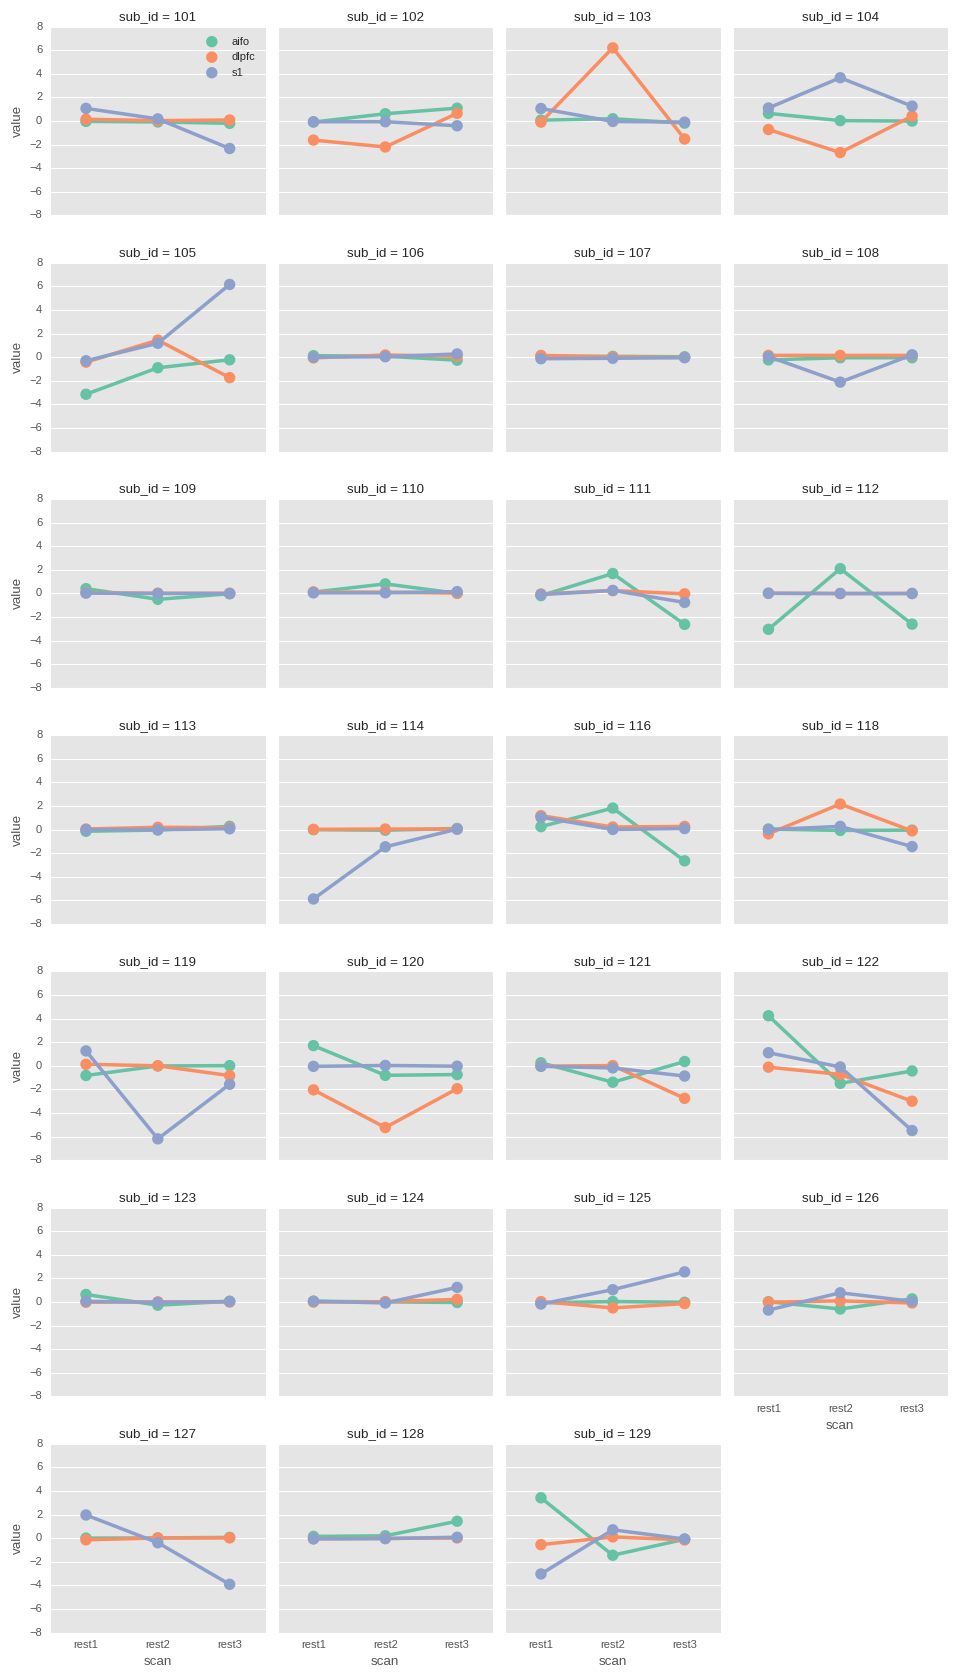

In [38]:
g = sns.FacetGrid(rois_dflat, col="sub_id", size=3, aspect=1, col_wrap=4, legend_out=False)
g.map(sns.pointplot, "scan", "value", 'roi', palette="Set2");
g.add_legend()

### Check for motion confound

In [39]:
from scipy import io

In [43]:
mp_test = io.loadmat('/home/despo/arielle/megarest_sc/data/motion_params/101/motion_info_Aifo_FD_thr0.2.mat')

In [65]:
mp_test['Dmotion'][0][0].shape

(176, 6)

In [46]:
mp_test.keys()

['Mparams',
 'Dmotion',
 'AGmotion',
 '__header__',
 '__globals__',
 'TRs_keep',
 '__version__',
 'TRs_exc']

In [38]:
np.io.('/home/despo/arielle/megarest_sc/data/motion_params/101/motion_info_Aifo_FD_thr0.2.mat')

IOError: Failed to interpret file '/home/despo/arielle/megarest_sc/data/motion_params/101/motion_info_Aifo_FD_thr0.2.mat' as a pickle